# Time to progresss on to regress(ion)

In dataexploration_01.ipynb, I explored the training data and cleaned it up

In this notebook, I'll run a few different types of linear regression models -- starting with simple OLS and moving onto some more techy ML models

The goal is to run different models using the **exact same data**, so I can compare their performance. This means that, although some models require different manipulations in the data to maximise performance (e.g. normality), I will forgo this for consistency.



Lets start off by importing the relevant libraries:

In [123]:
import pandas as pd                                 # Python library for handling structured data
from pathlib import Path                            # Clean way to work with file and folder paths
import matplotlib.pyplot as plt                     # Loads matplotlib's pypolot module for plotting graphs
import seaborn as sns                               # Statistically plotting library built on top of Matplotlib
import numpy as np                                  # Fundamental library for arrays and numerical operations
from scipy.stats import norm                        # Normal distribution object from SciPy's stats module
from scipy.stats import skew
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler    # Tool to standardise data from scikitlearn
from scipy import stats                             # Loads stats function (e.g. t-tests, correlations, distributions)
%matplotlib inline
# ^^ Makes Matplotlib plots appear inside the notebook (can zoom) ^^
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
# ^^ Makes plots look better on high-res screens ^^

Now, lets import our data and check that our clean training set is as we left it:

In [124]:
test = pd.read_csv(Path('../data/raw/test.csv'))
train_clean = pd.read_csv(Path('../data/processed/train_clean.csv'))
train_clean.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCond_TA,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,0,0,0,0,0,0,0,0
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,0,0,0,0,0,0,0,0
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,0,0,0,0,0,0,0,0
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,0,0,0,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Columns: 282 entries, Id to MiscFeature_Shed
dtypes: float64(9), int64(273)
memory usage: 3.1 MB


Now lets create matricies with our data for sklearn:

In [126]:
X_train_full = train_clean.drop("SalePrice", axis=1) # Features matrix (axis=1 drops columns, axis=0 drops rows)
y_train_full = train_clean["SalePrice"]               # Target variable (already log-transformed)

X_test = test.copy()                             # Features matrix for test set (no target variable in test set)
y_test = None                                     # No target variable in test set

Great, now lets split the training data into train and validation:

In [127]:
from sklearn.model_selection import train_test_split
from IPython.display import display

X_train, X_valid, y_train, y_valid = train_test_split(

    X_train_full,     # This is the features matrix
    y_train_full,     # This is the target variable
    test_size=0.2, # 20% of the data will be used for validation
    random_state=42     # Setting a random state ensures reproducibility of results

)

# This code splits the original training data into two sets:
# - X_train and y_train: These will be used to train your models.
# - X_valid and y_valid: These will be used to validate your models' performance.
# The split is 80% for training and 20% for validation, and random_state=42 ensures reproducibility.

display(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)
print("First 5 rows of X_train:")
display(X_train.head())
print("First 5 rows of X_valid:")
display(X_valid.head())

(1165, 281)

(292, 281)

(1165,)

(292,)

First 5 rows of X_train:


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCond_TA,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed
254,255,20,8400,5,6,1957,1957,922.0,0.0,392.0,...,0,0,0,0,0,0,0,0,0,0
1362,1365,160,3180,7,5,2005,2005,0.0,0.0,600.0,...,0,0,0,0,0,0,0,0,0,0
636,638,190,6000,5,4,1954,1954,0.0,0.0,811.0,...,0,0,0,0,0,0,0,0,0,0
973,975,70,11414,7,8,1910,1993,0.0,0.0,728.0,...,0,0,0,0,0,0,0,0,0,0
514,515,45,10594,5,5,1926,1950,0.0,0.0,768.0,...,0,0,0,0,0,0,0,0,0,0


First 5 rows of X_valid:


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCond_TA,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed
497,498,50,9120,7,6,1925,1950,329.0,0.0,697.0,...,0,0,0,0,0,0,0,0,0,0
1262,1264,70,13515,6,6,1919,1950,0.0,0.0,764.0,...,0,0,0,0,0,0,0,0,0,0
411,412,190,34650,5,5,1955,1955,1056.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1047,1049,20,21750,5,4,1960,2006,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1034,1036,20,11500,4,3,1957,1957,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Perfect! Now we can start running some models!

# Linear Regression (Ordinary Least Squares)

Definition:
- A linear approach to modelling the relationship between a dependent variable and one or more independent variables
- The model finds the best-fitting line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences between the observed and predicted values
- Commonly used for regression tasks where the goal is to predict a continuous outcome
- Often used as a baseline model due to its simplicity and interpretability

Assumptions:
- Linearity: The relationship between the independent and dependent variables is linear
- Independence: The residuals (errors) are independent of each other
- Homoscedasticity: The residuals have constant variance at every level of the independent variable
- Normality: The residuals of the model are normally distributed
- **Note: If these assumptions are violated, the results of the linear regression may be invalid. This means that the model's predictions may be biased or unreliable.**

Strengths:
- Simplicity: Easy to understand and interpret
- Efficiency: Computationally efficient and fast to train
- Baseline: Serves as a good baseline model for comparison with more complex models

Weaknesses:
- Linearity: Assumes a linear relationship between input and output, which may not hold true
- Sensitivity: Can be sensitive to outliers and multicollinearity among predictors
- Assumptions: Assumes that the residuals (errors) are normally distributed and homoscedastic (constant variance)

Caution:
- Ensure that the assumptions of linear regression are met before applying the model
- Consider feature engineering or transformations if the relationship is not linear
- Be cautious of overfitting, especially with a large number of predictors
- Regularization techniques (like Ridge or Lasso regression) can be used to mitigate some weaknesses [will do this in subsequent models]

Steps:
1.  Fit the model on the training data
2.  Validate the model on the validation data
3.  Evaluate the model's performance using appropriate metrics (e.g., RMSE, MAE)
4.  Fine-tune the model as needed
5.  Use the model to make predictions on the test data

Instructions here: https://realpython.com/linear-regression-in-python/

In [142]:
## We'll start off with sklearn 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Add intercept
X_train = sm.add_constant(X_train, has_constant='add')
X_valid = sm.add_constant(X_valid, has_constant='add')

ols_sklearn = LinearRegression(fit_intercept= False) # Create a Linear Regression model and specify that we don't want to fit the intercept (since we've already added it)
ols_sklearn.fit(X_train, y_train) # Fit the model to the training data

,fit_intercept,False
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [143]:
## Now let's use statsmodels to get a detailed summary of the regression results

import statsmodels.api as sm

# Fit OLS regression
ols_sm = sm.OLS(y_train, X_train).fit()

# Show summary
print(ols_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     94.94
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:04:14   Log-Likelihood:                 1138.0
No. Observations:                1165   AIC:                            -1906.
Df Residuals:                     980   BIC:                            -969.8
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.27

Quick check to prove that both libraries give the same results:

In [144]:
## Start with sklearn

y_train_pred_sklearn = ols_sklearn.predict(X_train) # Predict on the training data
y_valid_pred_sklearn = ols_sklearn.predict(X_valid) # Predict on the validation data

train_rmse_sklearn = np.sqrt(mean_squared_error(y_train, y_train_pred_sklearn))
valid_rmse_sklearn = np.sqrt(mean_squared_error(y_valid, y_valid_pred_sklearn))

## Now with statsmodels

y_train_pred_sm = ols_sm.predict(X_train) # Predict on the training data
y_valid_pred_sm = ols_sm.predict(X_valid) # Predict on the validation data

train_rmse_sm = np.sqrt(mean_squared_error(y_train, y_train_pred_sm))
valid_rmse_sm = np.sqrt(mean_squared_error(y_valid, y_valid_pred_sm))

# Now lets compare how each model does on the training set

print("Train RMSE:")
print(f"Sklearn OLS: {train_rmse_sklearn}")
print(f"Statsmodels OLS: {train_rmse_sm}")

print("\nValidation RMSE:")
print(f"Sklearn OLS: {valid_rmse_sklearn}")
print(f"Statsmodels OLS: {valid_rmse_sm}")

# Both models should give identical results, as they are both fitting the same linear regression model.



Train RMSE:
Sklearn OLS: 0.09110254294862187
Statsmodels OLS: 0.09110254294862168

Validation RMSE:
Sklearn OLS: 0.1354928782103456
Statsmodels OLS: 0.13549287820974132


Great, both of our OLS models are showing identical performance. For consistency, I'll just use the Statsmodel OLS model going forward.

Now that we have fit the model on the training data, we need to do the following:


1. Check all typical regression assumptions are satisfied **(model diagnostics using training data)**
    - Residuals vs fitted (to test linearity and homoscedasticity)
    - Distribution of residuals (to test normality)
2. Validate the model on the validation data (to see whether the model's errors generalise to unseen data) **(performance evaluation using validation data)**
    - Predicted vs actual plots
    - RMSE / MAE / R^2
    - Error distribution plots

3. One final check on the test data (to see how well the model performs on completely unseen data) **(final evaluation using test data)**
    - Predicted vs actual plots
    - RMSE / MAE / R^2
    - Error distribution plots



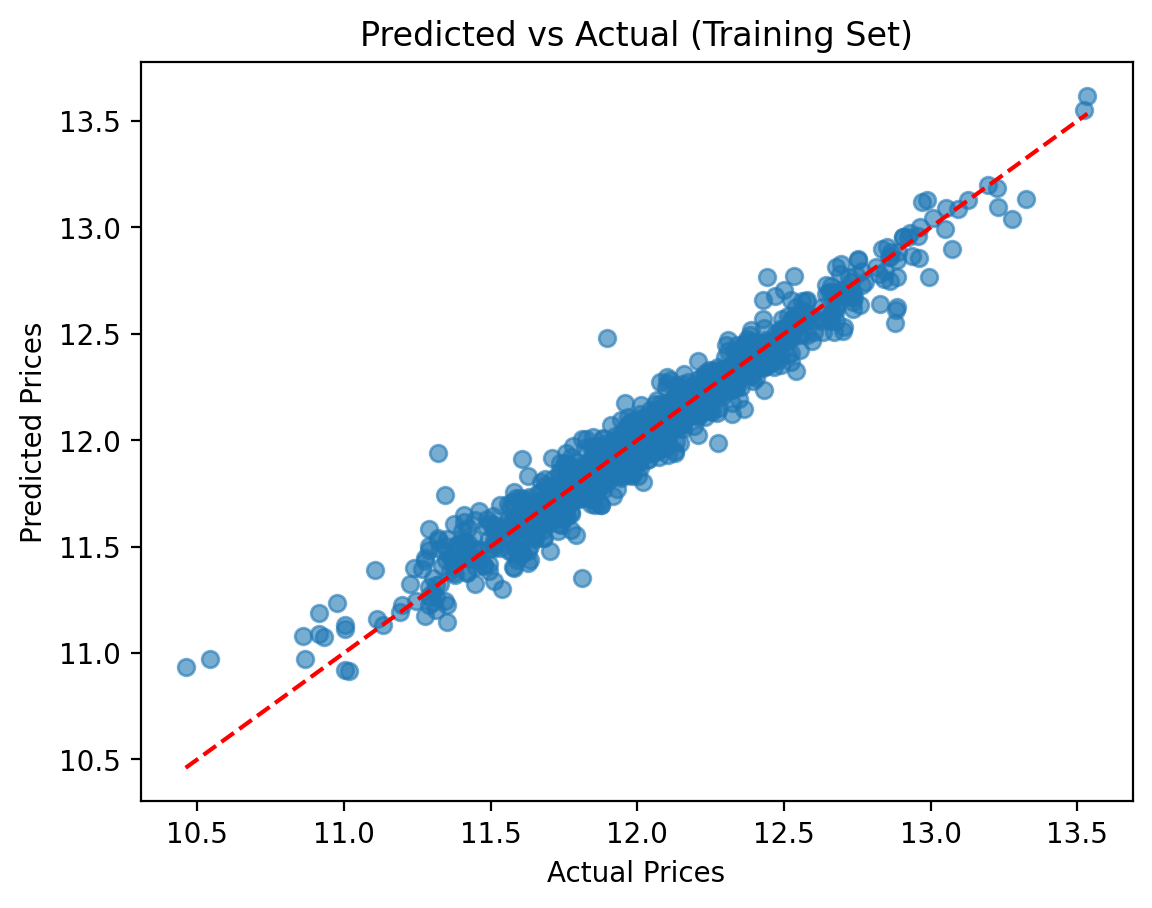

In [145]:
plt.scatter(y_train, y_train_pred_sm, alpha=0.6)    # Scatter plot of actual vs predicted prices
plt.plot([y_train.min(), y_train.max()],            
         [y_train.min(), y_train.max()],
         'r--')  # 45-degree reference line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual (Training Set)")
plt.show()

Now, lets check the residuals to see if they are normally distributed and homoscedastic:

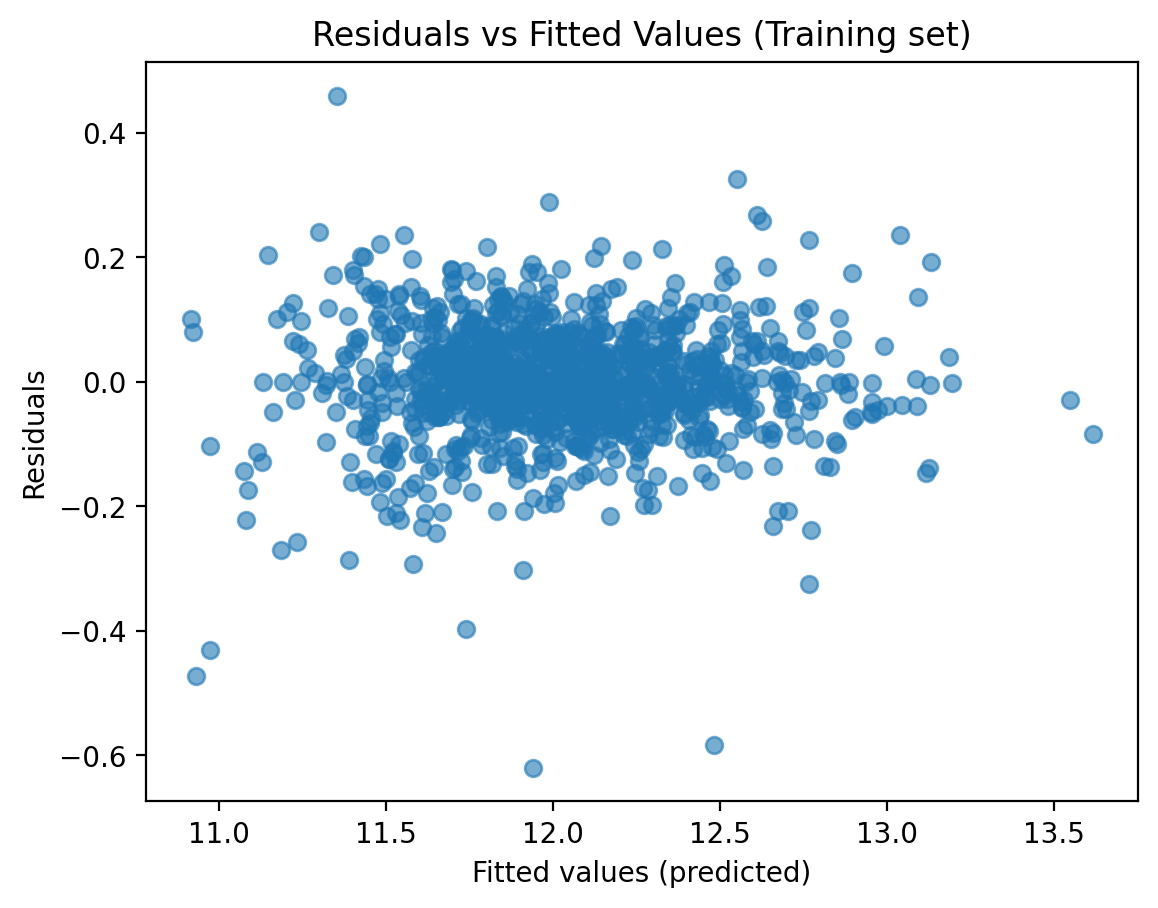

In [146]:
## Testing homoscedasticity assumption

residuals_train = y_train - y_train_pred_sm

plt.scatter(y_train_pred_sm, residuals_train, alpha=0.6)
plt.xlabel ("Fitted values (predicted)")
plt.title("Residuals vs Fitted Values (Training set)")
plt.ylabel("Residuals")

plt.show()


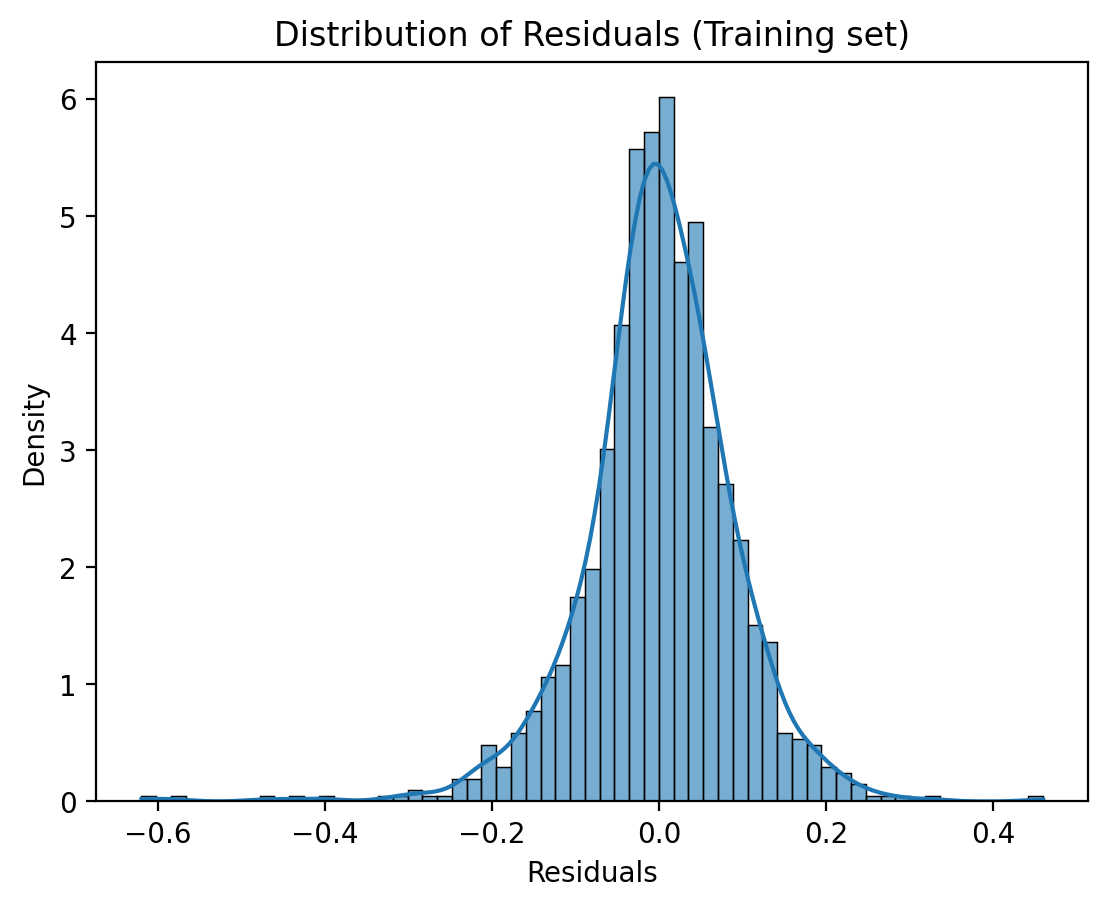

In [147]:
sns.histplot(residuals_train, kde=True, stat="density", alpha = 0.6)
plt.title("Distribution of Residuals (Training set)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()


Great, it looks like the residuals are distributed somewhat normally, meaning our model is likely valid.

Now, we can move on to evaluate performance on the validation set:

In [148]:
valid_rmse_sm = np.sqrt(mean_squared_error(y_valid, y_valid_pred_sm))
r2 = r2_score(y_valid, y_valid_pred_sm)

print(f"Validation RMSE: {valid_rmse_sm:.2f}")
print(f"Validation R^2: {r2:.4f}")



Validation RMSE: 0.14
Validation R^2: 0.8942


Now, lets do some visual checks:

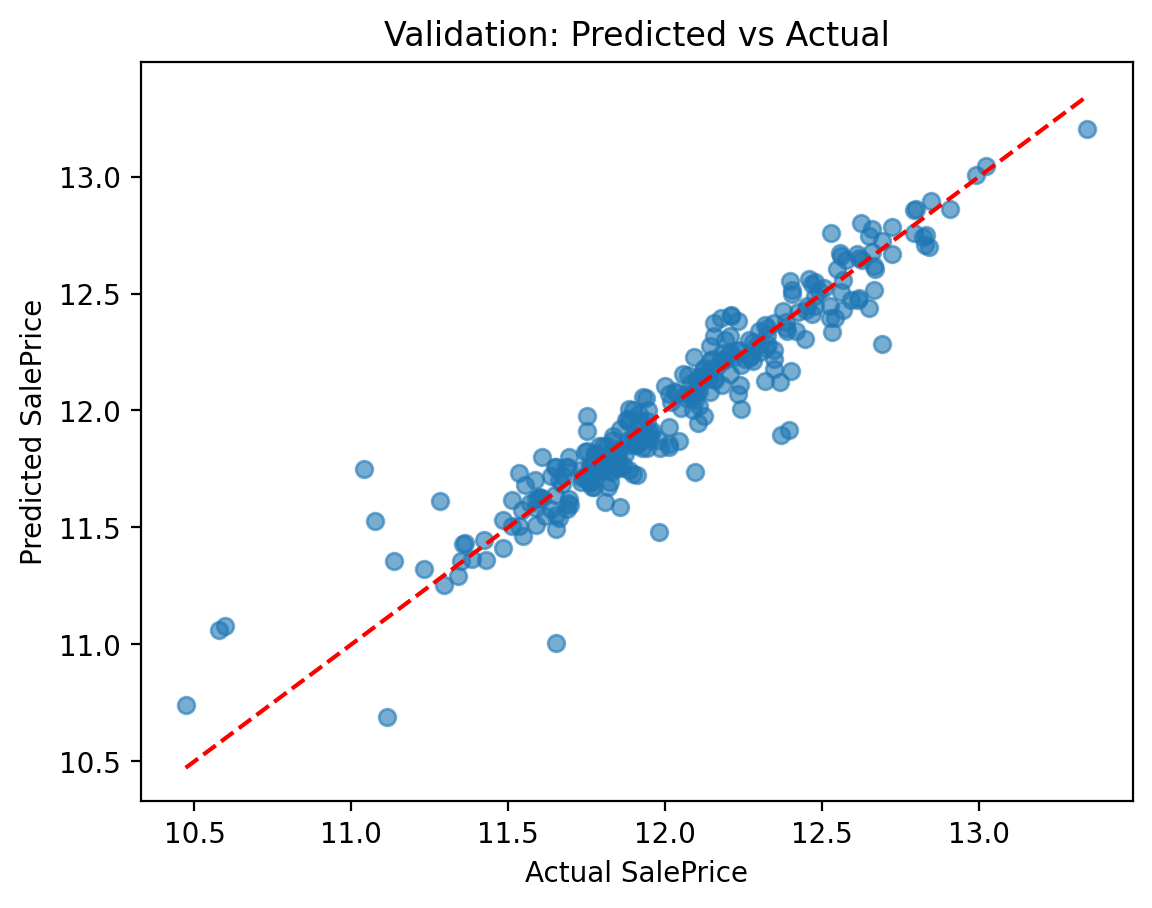

In [156]:
plt.scatter(y_valid, y_valid_pred_sm, alpha=0.6)  
plt.plot([y_valid.min(), y_valid.max()],
         [y_valid.min(), y_valid.max()],
         'r--')  # perfect predictions
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Validation: Predicted vs Actual")
plt.show()

Looks good! The points are fairly close to the 45-degree line, indicating that the model's predictions are reasonably accurate. Now lets check the distribution of the residuals:

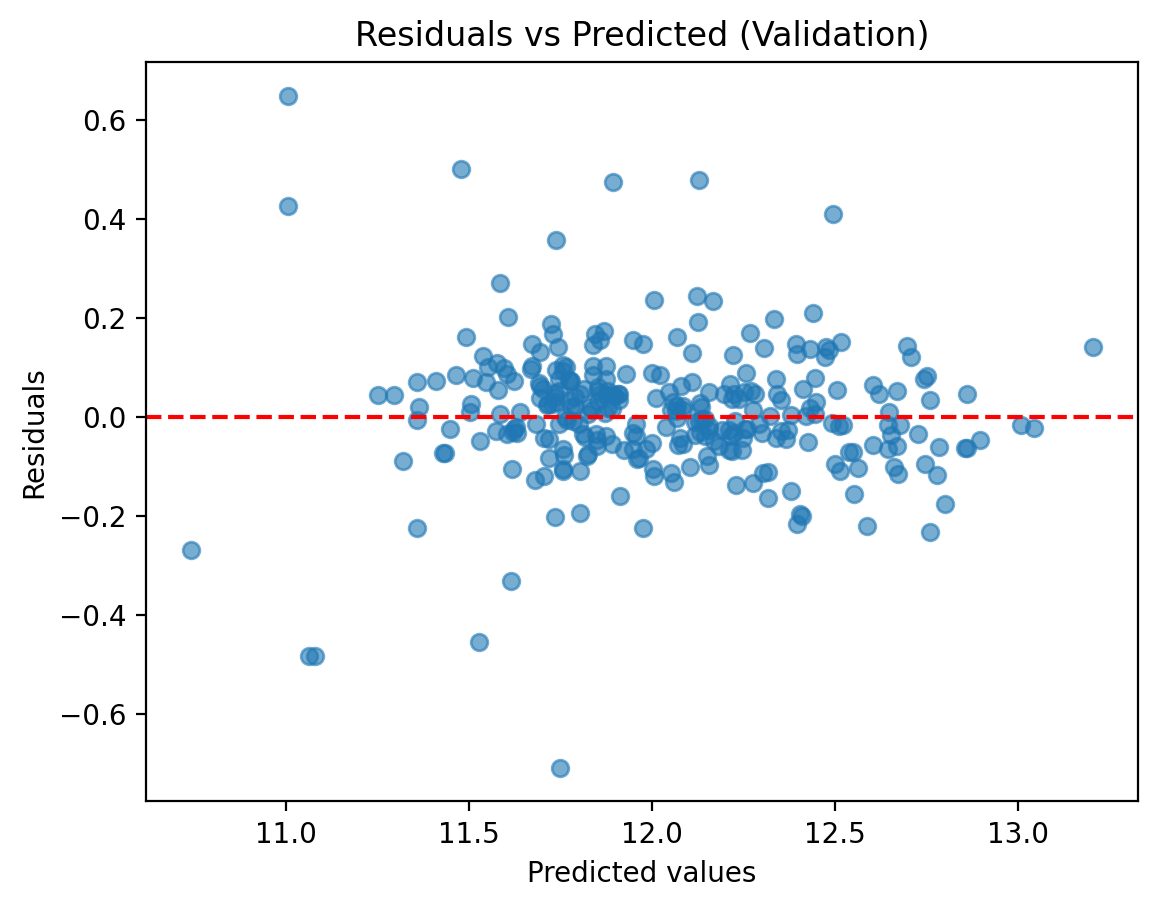

In [157]:
residuals_valid = y_valid - y_valid_pred_sm

plt.scatter(y_valid_pred, residuals_valid, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Validation)")
plt.show()

All looks good! Lets move on to the test set now.